<a href="https://colab.research.google.com/github/JunHyeong-data/ML-DL-Study/blob/main/Basic-Deep-Learning/09_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%93%9C%EB%9E%8D%EC%95%84%EC%9B%83_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dropout Layer와 Regularization

이번 장에서는 뉴럴 네트워크에서 오버피팅(overfitting)을 완화하는 데 중요한 역할을 하는 **드롭아웃(Dropout) 레이어**에 대해 다룬다.

---

## 1. Overfitting이란?

오버피팅이란 모델이 **훈련 데이터(training data)** 에는 매우 높은 성능을 보이지만,  
**테스트 데이터(test data) 또는 실제 환경**에서는 성능이 크게 떨어지는 현상을 의미한다.

일반적으로 데이터는 훈련용 데이터와 테스트(또는 검증) 데이터로 나누어 사용한다.  
모델이 훈련 데이터에 지나치게 맞춰 학습되면 훈련 정확도는 99% 이상이지만,  
테스트 데이터에서는 성능이 절반 이하로 떨어질 수 있다.  
이러한 모델은 실제 상황에서 사용할 수 없다.

직관적인 결정 경계는 단순한 선이지만,  
오버피팅된 모델은 훈련 데이터를 완벽히 분류하기 위해  
불필요하게 복잡한 결정 경계를 만든다.

---

## 2. 오버피팅의 예시

회오리(spiral) 형태의 데이터를 생성하여  
훈련 데이터와 검증 데이터로 나눈다.

오버피팅 현상을 명확히 보기 위해 미니 배치를 사용하지 않고,  
히든 레이어 3개, 각 히든 레이어의 차원이 16인 뉴럴 네트워크를 학습시킨다.

학습 결과를 보면,
- 훈련 손실(training loss)은 지속적으로 감소하지만
- 검증 손실(validation loss)은 일정 수준 이하로 더 이상 감소하지 않는다

이는 모델이 검증 데이터가 아닌 **훈련 데이터에만 맞춰 학습되었기 때문**이며,  
명확한 오버피팅 상태이다.

---

## 3. Regularization과 Dropout

이러한 문제를 완화하기 위한 기법을  
**정규화(Regularization)** 또는 **일반화(Generalization)** 라고 한다.

드롭아웃(Dropout)은 대표적인 정규화 기법 중 하나이다.

드롭아웃의 핵심 아이디어는  
**여러 개의 서로 다른 뉴럴 네트워크를 동시에 학습시키는 효과**를  
하나의 모델 안에서 만들어낸다는 점이다.

---

## 4. Dropout의 동작 원리

히든 레이어에 4개의 뉴런이 있다고 가정하고,  
드롭아웃 확률을 0.5로 설정하면  
각 포워드 패스마다 뉴런이 **독립적으로 50% 확률로 비활성화**된다.

즉, 매 학습 스텝마다:
- 서로 다른 구조의 뉴럴 네트워크가 만들어지고
- 그 네트워크가 학습되는 효과가 발생한다

히든 레이어 크기가 4라면  
총 `2^4 = 16`개의 서로 다른 네트워크 조합이 가능하다.

히든 레이어 크기가 16이라면  
`2^16`개 이상의 네트워크 조합이 만들어진다.

---

## 5. Scaling Effect (Inverted Dropout)

드롭아웃을 적용하면 일부 뉴런이 꺼지기 때문에  
다음 레이어로 전달되는 전체 신호의 크기가 줄어든다.

이를 보정하기 위해 **학습 시(training time)에만**  
살아있는 뉴런의 출력을 `1 / (1 - p)` 배로 키운다.

예를 들어:
- 드롭아웃 확률 `p = 0.5`
- 어떤 뉴런의 출력이 `0.7`이라면

학습 시 해당 뉴런의 출력은 `0.7 × 2 = 1.4`가 된다.

이 방식을 **Inverted Dropout**이라고 하며,  
테스트 시에는 별도의 스케일링이 필요 없다.

---

## 6. PyTorch의 Dropout

PyTorch에서는 `nn.Dropout(p)`를 사용하여  
드롭아웃 확률을 간단히 설정할 수 있다.

대부분의 경우 기본값인 `p = 0.5`를 사용해도 충분하다.

히든 레이어 사이에 드롭아웃 레이어를 추가하여  
모델을 학습시키면,  
드롭아웃을 사용하지 않은 경우보다  
검증 손실이 더 낮아지는 것을 확인할 수 있다.

---

## 7. Mini-batch 학습과 Regularization

미니 배치 학습 역시 정규화 효과를 가진다.

매 학습 스텝마다:
- 전체 데이터 중 일부만 무작위로 선택하여 학습하고
- 다음 스텝에서는 또 다른 데이터 조합으로 학습한다

이 과정은 매번 **서로 다른 데이터 분포에 기반한 모델**을  
학습시키는 효과를 만들어낸다.

---

## 8. 기타 Regularization 기법

실제로는 다음과 같은 기법들도 함께 사용된다.

- Early Stopping
- Weight Decay (L2 Regularization)
- Batch Normalization

Batch Normalization은 입력 분포를 강제로 정규화하여  
학습 과정에 노이즈를 추가하고,  
이 노이즈가 결과적으로 정규화 효과를 만든다.

---

## 9. 가장 강력한 Regularization

가장 강력한 정규화 방법은  
**더 많은 데이터를 확보하는 것**이다.

드롭아웃이나 배치 학습은  
제한된 데이터로 모델을 일반화하기 위한 기법이지만,  
데이터 자체가 충분히 많다면  
모델은 자연스럽게 일반화된다.

회오리 데이터의 개수를 기존보다 100배 늘려 학습하면,  
같은 드롭아웃 모델이라도  
결정 경계가 훨씬 안정적으로 형성되는 것을 확인할 수 있다.

---

## 결론

- 드롭아웃은 여러 모델을 앙상블한 효과를 만든다
- 정규화는 오버피팅을 완화하기 위한 핵심 기법이다
- 가장 강력한 정규화는 충분한 데이터 확보이다


In [1]:
!git clone https://github.com/NoCodeProgram/deepLearning.git

Cloning into 'deepLearning'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 318 (delta 80), reused 134 (delta 55), pack-reused 139 (from 1)
Receiving objects: 100% (318/318), 17.60 MiB | 28.88 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [8]:
import torch
import pandas as pd

# Load the DataFrame from a CSV file
df = pd.read_csv('./deepLearning/nn/swirl.csv')
print(df.head())
data = df[['x', 'y']].values
labels = df['label'].values.reshape(-1, 1)

# Print the shapes of the data and labels
print('Data shape:', data.shape)
print('Labels shape:', labels.shape)

          x         y  label
0 -0.657569 -0.199413    1.0
1 -0.225905  0.638206    1.0
2 -0.943634  0.107502    0.0
3  0.527481 -0.337930    0.0
4 -0.023178  0.789206    0.0
Data shape: (280, 2)
Labels shape: (280, 1)


Text(0, 0.5, 'y')

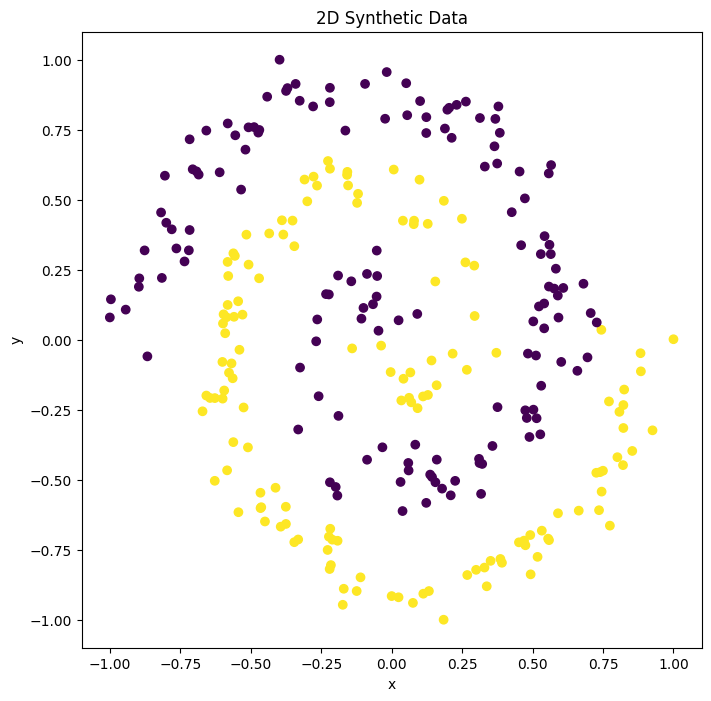

In [9]:
import matplotlib.pyplot as plt
# Create a scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis')
# plt.scatter(val_data[:,0], val_data[:,1], c=val_labels, cmap='viridis')

# Set the title and labels
plt.title('2D Synthetic Data')
plt.xlabel('x')
plt.ylabel('y')

In [11]:
import torch

# Convert the numpy arrays to PyTorch tensors
data_torch = torch.tensor(data, dtype=torch.float32)
labels_torch = torch.tensor(labels, dtype=torch.float32)
data_length = len(data_torch)
split_length = int(0.7*data_length)

train_data = data_torch[:split_length]
train_labels = labels_torch[:split_length]
val_data = data_torch[split_length:]
val_labels = labels_torch[split_length:]

print(train_data.shape, train_labels.shape)

torch.Size([196, 2]) torch.Size([196, 1])


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

input_size = 2
hidden_size = 16
output_size = 1

g = torch.Generator().manual_seed(42)
g.manual_seed(42)
torch.manual_seed(42)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)


net = Net()

loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

for steps in range(25000):
    net.train()

    output = net(train_data)
    train_loss = loss_fn(output, train_labels)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if steps % 1000 == 0:
        net.eval()
        output = net(val_data)
        val_loss = loss_fn(output, val_labels)
        output = net(train_data)
        t_loss = loss_fn(output,train_labels)
        print(f"{steps} val_loss: {val_loss.item()}, train_loss: {t_loss.item()}")

0 val_loss: 0.6986218094825745, train_loss: 0.6956213116645813
1000 val_loss: 0.691857635974884, train_loss: 0.6905266046524048
2000 val_loss: 0.6866223216056824, train_loss: 0.6839669942855835
3000 val_loss: 0.6573339700698853, train_loss: 0.6506971120834351
4000 val_loss: 0.5904173851013184, train_loss: 0.583895206451416
5000 val_loss: 0.5605559349060059, train_loss: 0.5539382100105286
6000 val_loss: 0.519599437713623, train_loss: 0.5029333829879761
7000 val_loss: 0.43668198585510254, train_loss: 0.37637075781822205
8000 val_loss: 0.40086132287979126, train_loss: 0.3169535994529724
9000 val_loss: 0.3742118775844574, train_loss: 0.28214871883392334
10000 val_loss: 0.3530939221382141, train_loss: 0.24136649072170258
11000 val_loss: 0.32104364037513733, train_loss: 0.19410917162895203
12000 val_loss: 0.28524860739707947, train_loss: 0.13822554051876068
13000 val_loss: 0.265522837638855, train_loss: 0.0947471633553505
14000 val_loss: 0.2867063283920288, train_loss: 0.08565308898687363
15

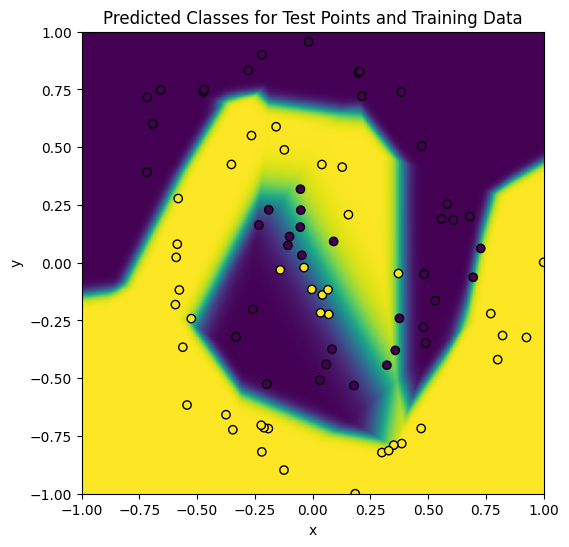

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of points along each dimension (x and y)
n_points = 300

# Create a grid of uniformly spaced points over [-1, 1] in both x and y dimensions
x_points = np.linspace(-1, 1, n_points)
y_points = np.linspace(-1, 1, n_points)
x_grid, y_grid = np.meshgrid(x_points, y_points)
points_test = np.vstack((x_grid.flatten(), y_grid.flatten())).T

# Convert the points to a PyTorch tensor
points_test_torch = torch.from_numpy(points_test).float()

net.eval()
output_test = net(points_test_torch)

probabilities = torch.sigmoid(output_test)
probabilities_np = probabilities.detach().numpy()

plt.figure(figsize=(6, 6))

# Use imshow to display the gradation plot
plt.imshow(probabilities_np.reshape(n_points, n_points), extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
#plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, cmap='viridis', edgecolors='k')
plt.scatter(val_data[:,0], val_data[:,1], c=val_labels, cmap='viridis', edgecolors='k')

# Set the title and labels
plt.title('Predicted Classes for Test Points and Training Data')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

input_size = 2
hidden_size = 16
output_size = 1

g.manual_seed(42)
torch.manual_seed(42)

class DNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)


dnet = DNet()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(dnet.parameters(), lr=0.01)

for steps in range(25000):
    dnet.train()

    output = dnet(train_data)
    train_loss = loss_fn(output, train_labels)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if steps % 1000 == 0:
        dnet.eval()
        output = dnet(val_data)
        val_loss = loss_fn(output, val_labels)
        output = dnet(train_data)
        t_loss = loss_fn(output,train_labels)
        print(f"{steps} val_loss: {val_loss.item()}, train_loss: {t_loss.item()}")

0 val_loss: 0.6986224055290222, train_loss: 0.6956242322921753
1000 val_loss: 0.6923654079437256, train_loss: 0.6914576888084412
2000 val_loss: 0.6903262138366699, train_loss: 0.6887895464897156
3000 val_loss: 0.6831033825874329, train_loss: 0.680171012878418
4000 val_loss: 0.6592937707901001, train_loss: 0.6543227434158325
5000 val_loss: 0.6242577433586121, train_loss: 0.6201533079147339
6000 val_loss: 0.6028269529342651, train_loss: 0.6011606454849243
7000 val_loss: 0.5876692533493042, train_loss: 0.5851942300796509
8000 val_loss: 0.5675116777420044, train_loss: 0.5628044009208679
9000 val_loss: 0.5266045331954956, train_loss: 0.5178608894348145
10000 val_loss: 0.4843011498451233, train_loss: 0.4617747366428375
11000 val_loss: 0.44579315185546875, train_loss: 0.38874953985214233
12000 val_loss: 0.41124966740608215, train_loss: 0.33817681670188904
13000 val_loss: 0.3839856684207916, train_loss: 0.30575031042099
14000 val_loss: 0.36358320713043213, train_loss: 0.2826900780200958
15000 

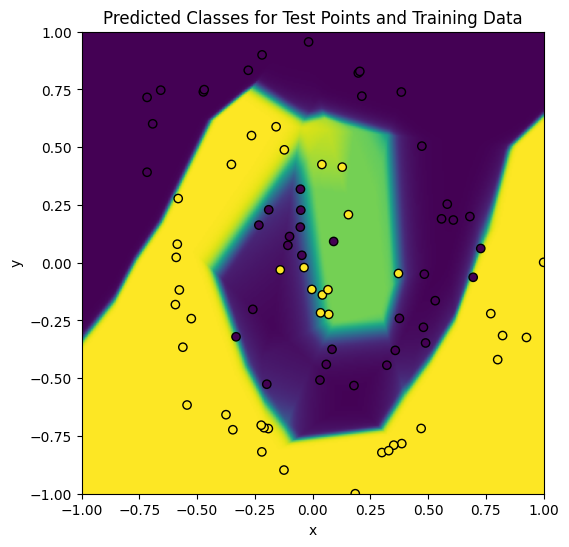

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of points along each dimension (x and y)
n_points = 300

# Create a grid of uniformly spaced points over [-1, 1] in both x and y dimensions
x_points = np.linspace(-1, 1, n_points)
y_points = np.linspace(-1, 1, n_points)
x_grid, y_grid = np.meshgrid(x_points, y_points)
points_test = np.vstack((x_grid.flatten(), y_grid.flatten())).T

# Convert the points to a PyTorch tensor
points_test_torch = torch.from_numpy(points_test).float()
dnet.eval()
output_test = dnet(points_test_torch)

probabilities = torch.sigmoid(output_test)
probabilities_np = probabilities.detach().numpy()

plt.figure(figsize=(6, 6))

# Use imshow to display the gradation plot
plt.imshow(probabilities_np.reshape(n_points, n_points), extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
# plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, cmap='viridis', edgecolors='k')
plt.scatter(val_data[:,0], val_data[:,1], c=val_labels, cmap='viridis', edgecolors='k')

# Set the title and labels
plt.title('Predicted Classes for Test Points and Training Data')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [16]:
import torch
import pandas as pd

# Load the DataFrame from a CSV file
df = pd.read_csv('./deepLearning/nn/swirl_10k.csv')
data = df[['x', 'y']].values
labels = df['label'].values.reshape(-1, 1)

# Print the shapes of the data and labels
print('Data shape:', data.shape)
print('Labels shape:', labels.shape)

Data shape: (20000, 2)
Labels shape: (20000, 1)


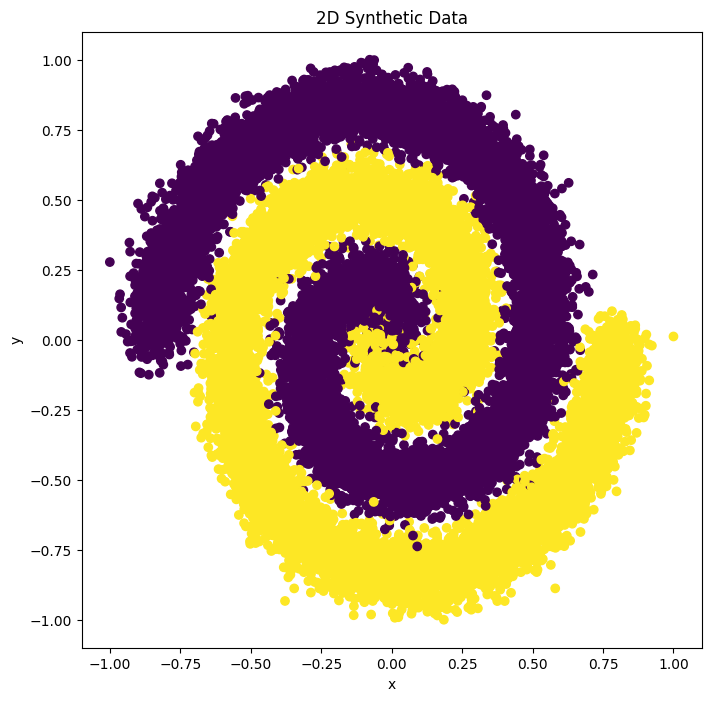

In [17]:
import matplotlib.pyplot as plt
# Create a scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis')
# plt.scatter(val_data[:,0], val_data[:,1], c=val_labels, cmap='viridis')

# Set the title and labels
plt.title('2D Synthetic Data')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [18]:
import torch

# Convert the numpy arrays to PyTorch tensors
data_torch = torch.tensor(data, dtype=torch.float32)
labels_torch = torch.tensor(labels, dtype=torch.float32)
data_length = len(data_torch)
split_length = int(0.7*data_length)

train_data = data_torch[:split_length]
train_labels = labels_torch[:split_length]
val_data = data_torch[split_length:]
val_labels = labels_torch[split_length:]

print(train_data.shape, train_labels.shape)

torch.Size([14000, 2]) torch.Size([14000, 1])


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

input_size = 2
hidden_size = 16
output_size = 1

g.manual_seed(42)
torch.manual_seed(42)

class DNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)


dnet = DNet()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(dnet.parameters(), lr=0.01)

for steps in range(200000):
    dnet.train()

    output = dnet(train_data)
    train_loss = loss_fn(output, train_labels)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if steps % 1000 == 0:
        dnet.eval()
        output = dnet(val_data)
        val_loss = loss_fn(output, val_labels)
        output = dnet(train_data)
        t_loss = loss_fn(output,train_labels)
        print(f"{steps} val_loss: {val_loss.item()}, train_loss: {t_loss.item()}")

0 val_loss: 0.6951485276222229, train_loss: 0.6962178945541382
1000 val_loss: 0.6915423274040222, train_loss: 0.6913528442382812
2000 val_loss: 0.6890953183174133, train_loss: 0.6887837648391724
3000 val_loss: 0.6826016306877136, train_loss: 0.6819750070571899
4000 val_loss: 0.6670556664466858, train_loss: 0.6656181812286377
5000 val_loss: 0.648485541343689, train_loss: 0.6459358930587769
6000 val_loss: 0.636981189250946, train_loss: 0.6335797905921936
7000 val_loss: 0.628889262676239, train_loss: 0.6248418092727661
8000 val_loss: 0.6197701692581177, train_loss: 0.6150380969047546
9000 val_loss: 0.6031124591827393, train_loss: 0.5974791646003723
10000 val_loss: 0.5770171880722046, train_loss: 0.5697914958000183
11000 val_loss: 0.545468270778656, train_loss: 0.5364565253257751
12000 val_loss: 0.5230040550231934, train_loss: 0.5129802823066711
13000 val_loss: 0.5087806582450867, train_loss: 0.4982166588306427
14000 val_loss: 0.4990329444408417, train_loss: 0.4880257844924927
15000 val_lo

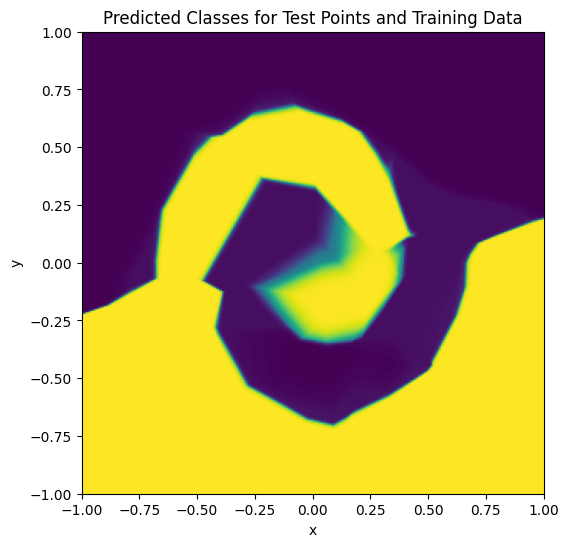

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of points along each dimension (x and y)
n_points = 300

# Create a grid of uniformly spaced points over [-1, 1] in both x and y dimensions
x_points = np.linspace(-1, 1, n_points)
y_points = np.linspace(-1, 1, n_points)
x_grid, y_grid = np.meshgrid(x_points, y_points)
points_test = np.vstack((x_grid.flatten(), y_grid.flatten())).T

# Convert the points to a PyTorch tensor
points_test_torch = torch.from_numpy(points_test).float()

dnet.eval()
output_test = dnet(points_test_torch)

probabilities = torch.sigmoid(output_test)
probabilities_np = probabilities.detach().numpy()
# probabilities_np = (probabilities_np > 0.5)
plt.figure(figsize=(6, 6))

# Use imshow to display the gradation plot
plt.imshow(probabilities_np.reshape(n_points, n_points), extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
#plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, cmap='viridis', edgecolors='k')
# plt.scatter(val_data[:,0], val_data[:,1], c=val_labels, cmap='viridis', edgecolors='k')

# Set the title and labels
plt.title('Predicted Classes for Test Points and Training Data')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()